## Day 26 Lecture 2 Assignment

In this assignment, we will learn about linear regression model assumptions

In [12]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

from scipy.stats import bartlett
from scipy.stats import levene


We will load the dataset below that describes the antioxidant quality of lager.

The variables are as follows:
    
The dataset contains 7 variables :

- tpc - Total phenolic content
- ma - melanoidin content
- dsa - DPPH radical scavenging activity
- asa - ABTS radical cation scavenging activity
- orac - Oxygen radical absorbance activity
- rp - Reducing Power
- mca - Metal Chelaing Activity

In [2]:
lager = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/lager_antioxidant_reg.csv')

lager.head()

,beer,tpc,ma,dsa,asa,orac,rp,mca
0,1,148.23,13.37,0.66,0.81,3.81,0.45,10.65
1,2,160.38,10.96,0.63,0.64,2.85,0.41,15.47
2,3,170.41,9.22,0.62,0.81,3.34,0.48,15.70
3,4,208.65,9.65,0.90,1.01,3.34,0.50,76.65
4,5,146.03,11.72,0.64,0.90,3.18,0.47,9.39


We would like to predict the level of total phenolic content using the remaining 6 variables.

Start by removing the beer column since this column is the id for the observations.

In [3]:
#answer below:

lager.drop('beer', 1, inplace=True)


Split the data into train and test subsets. Select 25% of the data to be in the test subset. Use `tpc` as the y variable.

In [32]:
# answer below:
X = lager.drop('tpc', 1)
Y = lager.tpc
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

Next, we'll generate a linear model and make a residual vs. fit (homoscedasticity) plot. All Gauss-Markov assumptions should be evaluated on the training set.

How much heteroscedasticity is exhibited in the model?

In [41]:
#answer below:
lr = LinearRegression()

lr.fit(X_train, y_train)

y_preds_train = lr.predict(X_train)
y_preds_test = lr.predict(X_test)

errors_train = np.array(y_train) - np.array(y_preds_train)
errors_test = np.array(y_test) - np.array(y_preds_test)
np.mean(errors_train), np.mean(errors_test)

(-2.3684757858670007e-14, 3.2329984068319417)

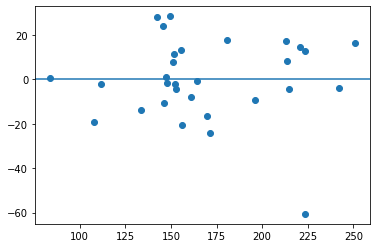

In [42]:
plt.scatter(y_preds_train, errors_train)
plt.axhline(y=0)
plt.show()

In [43]:
bart_stats = bartlett(y_preds_train, errors_train)
lev_stats = levene(y_preds_train, errors_train)

print(f'Bartlett: {bart_stats}')
print(f'Levene: {lev_stats}')

Bartlett: BartlettResult(statistic=16.445744546702866, pvalue=5.0062433220554675e-05)
Levene: LeveneResult(statistic=8.94786438099018, pvalue=0.004073492098526377)


Compute the VIF for all features in the model. You will need to add a constant to your data (make a new copy just for this) to compute this with statsmodels.

How collinear are your features?

In [44]:
# answer below:
vif_train = pd.Series([variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
          index=X_train.columns)
print(vif_train)


const    21.076300
ma        1.901395
dsa       3.847322
asa       1.775247
orac      1.607281
rp        2.447333
mca       1.527181
dtype: float64


Show a histogram of your error, and then plot the qq-plot for our errors (make sure to use a standardized line to compare them appropriately to the standard distribution.)

Remember to use training data.

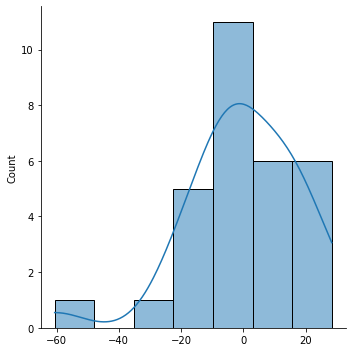

In [45]:
sns.displot(errors_train, kde=True)
plt.show()

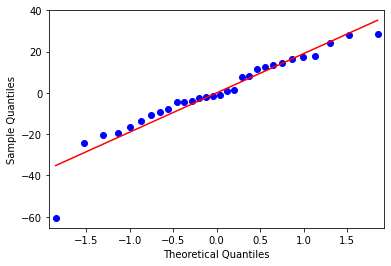

In [46]:
sm.qqplot(errors_train, line='r')
plt.show()

Plot the actual test data against test predictions to see how well your model predicts new data.

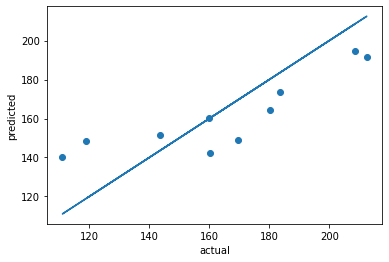

In [48]:
# answer below:
plt.plot(y_test, y_test)
plt.scatter(y_test, y_preds_test)
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()
